# Introduction to Data Analysis
## Dair Maxat BDA 1904
## Analysis of Top Anime 

## Introduction

### I don't know much about anime, but I really want to start watching. This analysis will introduce us to the genres of anime. It will help us choose the best way to start watching. 

### Data description
#### My dataset consist of two part: Anime.csv and Rating.csv
##### Anime.csv

~ anime_id - my anime list.net's unique id identifying an anime.

~ name - full name of anime.

~ genre - comma separated list of genres for this anime.

~ type - movie, TV, OVA, etc.

~ episodes - how many episodes in this show. (1 if movie).

~ rating - average rating out of 10 for this anime.

~ members - number of community members that are in this anime's
"group".

##### Rating.csv

~ user_id - non identifiable randomly generated user id.

~ anime_id - the anime that this user has rated.

~ rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

I take this dataset and used description 

link:https://www.kaggle.com/CooperUnion/anime-recommendations-database

## Research questions
1.Do user rating analysis

2.Find the most popular anime genres 

3.Analysis of popular genres and bring out the top

4.Compare the popularity of according to type of anime 

5.Make recommendations depending on the evaluations  

### Content 
1. Introduction
2. Research questions
3. Data description 
4. Data preparation
5. Data analysis 
7. Conclusion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [2]:
pwd

'C:\\Users\\Maksat\\Desktop\\IDA_project'

## Data preparation 

In [3]:
user_df=pd.read_csv(r"C:\Users\Maksat\Desktop\IDA_project\rating.csv")
user_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
user_df.shape

(7813737, 3)

#There you can see that users evaluated several anime at once, so this result 7813737 came out.

In [5]:
len(user_df["user_id"].unique())

73515

In [6]:
#there are only 73515 users who give their marks 

In [7]:
user_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [8]:
user_df.isnull().sum()


user_id     0
anime_id    0
rating      0
dtype: int64

In [9]:
#we can see that there are not missing values

In [10]:
anime_df=pd.read_csv(r"C:\Users\Maksat\Desktop\IDA_project\anime.csv")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [11]:
anime_df.shape

(12294, 7)

In [12]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [13]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

#we can see that there are some missing values in genre,type and rating 

In [14]:
print(anime_df["genre"].isnull().sum()/len(anime_df))

0.005043110460387181


In [15]:
print(anime_df["type"].isnull().sum()/len(anime_df))

0.0020335122824141857


In [16]:
print(anime_df["rating"].isnull().sum()/len(anime_df))

0.01870831299821051


#The problem with missing values genre,type and rating columns are not critica, so I fix it later.

In [17]:
anime_df.drop(columns=["members"], inplace=True)

In [18]:
anime_df.drop(columns=["episodes"], inplace=True)

#I decide that members and episodes columns does not really store any useful information for me and  lets drop it as well.

In [19]:
anime_df.isna().sum(), anime_df.isnull().sum()

(anime_id      0
 name          0
 genre        62
 type         25
 rating      230
 dtype: int64,
 anime_id      0
 name          0
 genre        62
 type         25
 rating      230
 dtype: int64)

In [20]:
anime_df = anime_df.dropna() 

In [21]:
anime_df.isna().sum(), anime_df.isnull().sum()

(anime_id    0
 name        0
 genre       0
 type        0
 rating      0
 dtype: int64,
 anime_id    0
 name        0
 genre       0
 type        0
 rating      0
 dtype: int64)

#there we drop data where we have missing values.

In [22]:
anime_df.describe()


,anime_id,rating
count,12017.000000,12017.000000
mean,13638.001165,6.478264
std,11231.076675,1.023857
min,1.000000,1.670000
25%,3391.000000,5.890000
50%,9959.000000,6.570000
75%,23729.000000,7.180000
max,34519.000000,10.000000


 #there we can notice that mean rating is 6.4 and minimal is 1.67

In [23]:
anime_df.head()


,anime_id,name,genre,type,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.17
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16


In [24]:
anime_df.tail()

,anime_id,name,genre,type,rating
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,4.15
12290,5543,Under World,Hentai,OVA,4.28
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.88
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,4.98
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,5.46


## Data analysis

<AxesSubplot:>

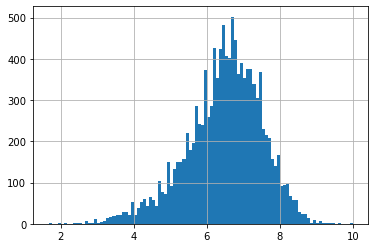

In [25]:
anime_df['rating'].hist(bins=100 )


#There we can see that many users have appreciated between 6 and 8.

#Make list all genres 

In [26]:
all_genres = ''
for genre in anime_df['genre'].to_list():
    all_genres += str(genre) + ', '

In [27]:
all_genres = all_genres.split(',')

In [28]:
all_genres = list(map(lambda x: x.strip() ,all_genres))

In [29]:
all_genres = set(all_genres)

In [30]:
for genre_name in all_genres:
    list_code = list(map(lambda x: 1 if x.find(genre_name)+1 else 0,anime_df['genre'].to_list()))
    anime_df.loc[:,'genre_%s'%genre_name] =list_code 

In [31]:
count_genres = {genre: anime_df['genre_%s'%genre].sum() for genre in all_genres}

In [32]:
count_genres = {key: value for key, value in sorted(count_genres.items(),key=lambda x: x[1],reverse=True)}


In [33]:
print(len(count_genres));

44


#we have 43 genres of anime

In [34]:
x = list(count_genres.keys())[37:43]
y = [count_genres[key] for key in x]

<AxesSubplot:>

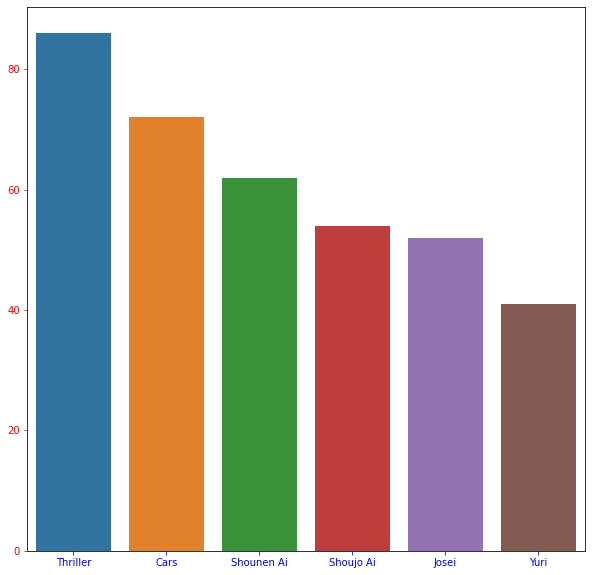

In [35]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

sns.barplot(x=x,y=y)

#top 5 of the worst anime genres 

##### The most unpopular anime
Yaoy is a genre of manga and anime, depicting homosexual relations between men.

In [36]:
x = list(count_genres.keys())[:5]
y = [count_genres[key] for key in x]

<AxesSubplot:>

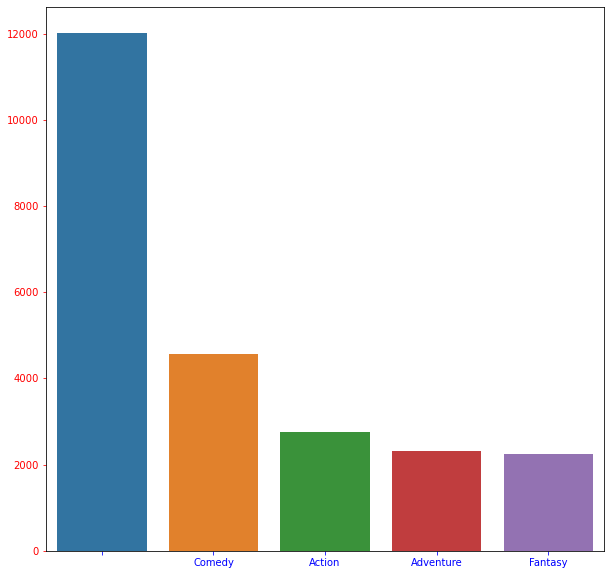

In [37]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

sns.barplot(x=x,y=y)

#Top 5 the best genres of anime 

How we can see users prefer to watch Comedy anime

##### We also need to show the average rating of the anime genres 

In [38]:
rating_genres = [(genre,anime_df[anime_df['genre_%s'%genre]==1]['rating'].mean()) for genre in all_genres]

In [39]:
rating_genres = sorted(rating_genres, key=lambda x: x[1], reverse=True)

In [40]:
len(rating_genres)

44

<AxesSubplot:xlabel='Genre', ylabel='Mean rating'>

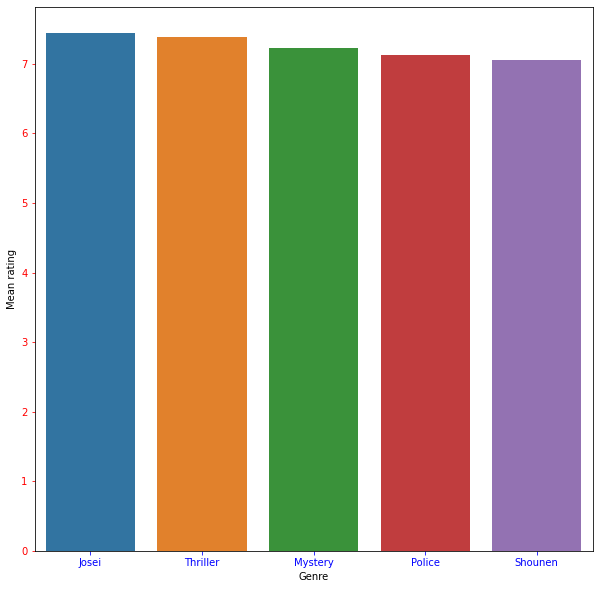

In [41]:
plt.figure(figsize=(10,10))
plt.xlabel('Genre')
plt.ylabel('Mean rating')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
sns.barplot(x=list(map(lambda x: x[0],rating_genres[:5])), y=list(map(lambda x: x[1],rating_genres[:5])))

There i show top 5 anime genres that have a high average rating 

In [42]:
values = anime_df['type'].value_counts()

In [43]:
labels = values.index.to_list()
values = values.to_list()
values,labels

([3668, 3284, 2259, 1670, 648, 488],
 ['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music'])

#We have 6 subdivisions of Anime.

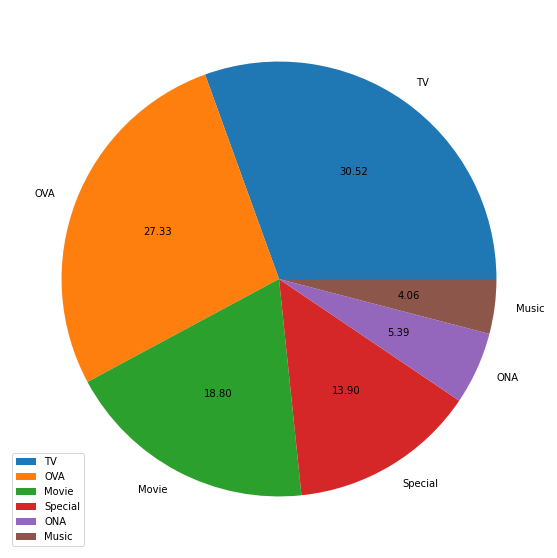

In [44]:
plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,autopct='%.2f')
_ = plt.legend(labels)

 #According to diagram we can notice that people prefer watch  TV OVA and Movie type of anime

In [45]:
type_rating= [(type_name, anime_df[anime_df['type']==type_name]['rating'].mean()) for type_name in anime_df['type'].unique()]

In [46]:
type_rating = sorted(type_rating, key=lambda x: x[1],reverse=True)

<AxesSubplot:xlabel='Type', ylabel='Mean rating'>

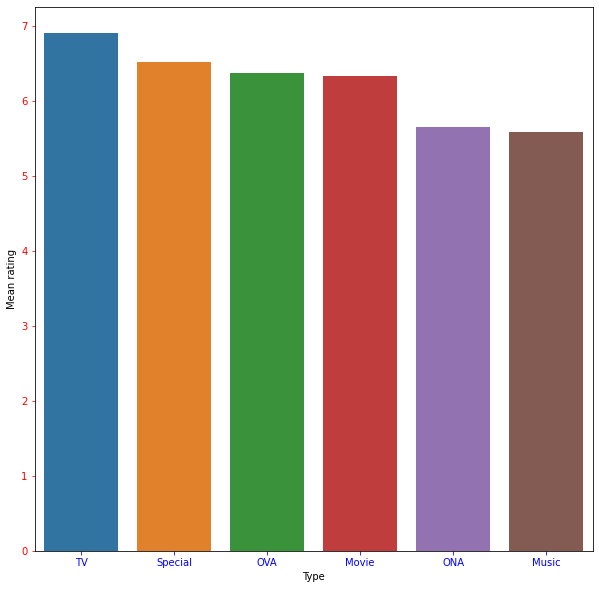

In [47]:
plt.figure(figsize=(10,10))
plt.xlabel('Type')
plt.ylabel('Mean rating')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red' )
sns.barplot(x=list(map(lambda x: x[0],type_rating)), y=list(map(lambda x: x[1],type_rating)))

#### In this graph, you can see that the highest average rating has reached the types TV and Special.  
#Despite the fact that only 13.9% of all assessed types of Anime is "Special" type, its average rating is high. We conclude that many people rated this type of Anime well.  

## Conclusion 

##### The purpose of the analysis was to get acquainted with the genres of anime and their types as well as to understand which anime is best to start watch. 

As a result, we found that the most popular genre in our "Comedy" is watched by noticeably many people compared to others. The most unpopular was the genre of Yaoy.

As for ratings, the highest average rating has "Josei" as well as "Mystery", "Thriller", "Police", "Shounen".

In addition, we analyzed the types of anime and their ratings depend on type. Of all the assessed types of anime: 30.5% is "TV",27% is "OVA" and 18% is "Movie" and the rest. The highest rating has the type "TV" but despite the fact that the type "Special" watched only 13% it has a high rating. This makes it in demand relative to others. 
